## Aim: To perform EDA of all the files in the Dataset

# Load Data 

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
load_data()
!ls

File Downloaded
champs-scalar-coupling_new.zip
Archive:  champs-scalar-coupling_new.zip
  inflating: mulliken_charges.csv    
  inflating: structures.csv          
  inflating: structures.zip          
  inflating: test.csv                
  inflating: train.csv               
  inflating: sample_submission.csv   
  inflating: magnetic_shielding_tensors.csv  
  inflating: potential_energy.csv    
  inflating: scalar_coupling_contributions.csv  
  inflating: dipole_moments.csv      
champs-scalar-coupling_new.zip	scalar_coupling_contributions.csv
dipole_moments.csv		structures.csv
magnetic_shielding_tensors.csv	structures.zip
mulliken_charges.csv		test.csv
potential_energy.csv		train.csv
sample_submission.csv


# EDA (train.csv)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
train=pd.read_csv('train.csv')
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [5]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,4.65815e+06,NaN,NaN,NaN,2.32907e+06,1.34469e+06,0,1.16454e+06,2.32907e+06,3.49361e+06,4.65815e+06
molecule_name,4658147,85003,dsgdb9nsd_042139,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atom_index_0,4.65815e+06,NaN,NaN,NaN,13.3569,3.26771,0,11,13,16,28
atom_index_1,4.65815e+06,NaN,NaN,NaN,5.88397,4.99394,0,2,5,8,28
type,4658147,8,3JHC,1510379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scalar_coupling_constant,4.65815e+06,NaN,NaN,NaN,15.9216,34.942,-36.2186,-0.254978,2.28113,7.39065,204.88


In [5]:
train.isna().describe(include='all')

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
count,4658147,4658147,4658147,4658147,4658147,4658147
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,4658147,4658147,4658147,4658147,4658147,4658147


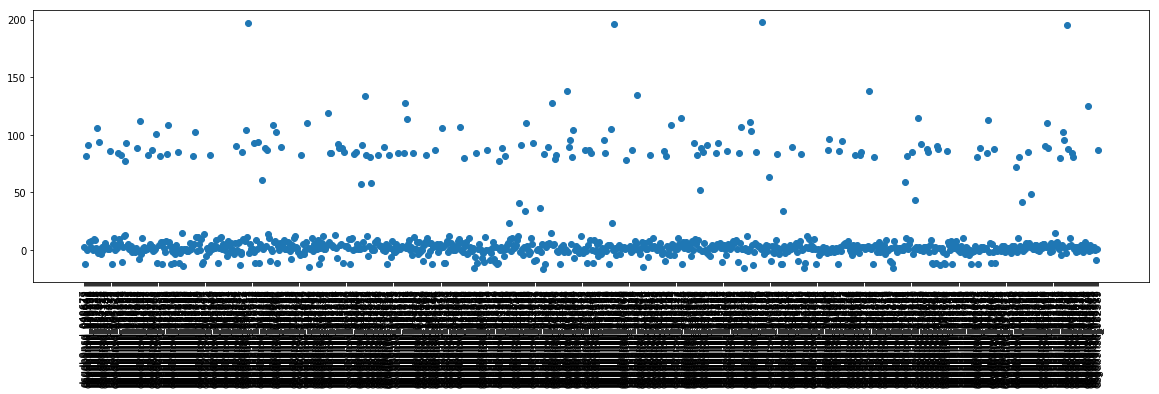

In [7]:
plt.figure(figsize=(20,5))
plt.scatter(train_sample['molecule_name'],train_sample['scalar_coupling_constant']);
plt.xticks(rotation='vertical');

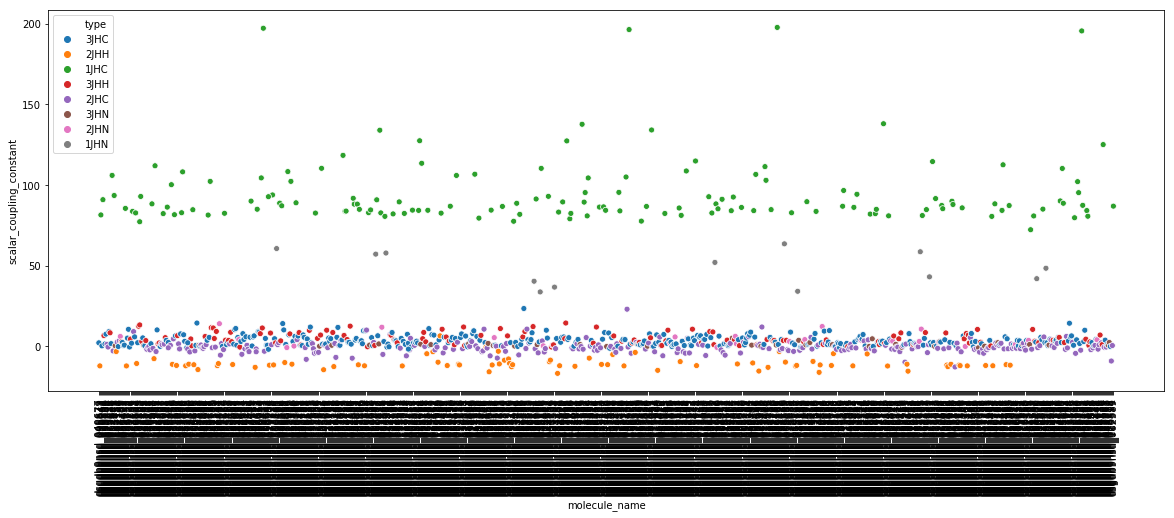

In [8]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=train_sample,x='molecule_name',y='scalar_coupling_constant',hue='type')
plt.xticks(rotation='vertical');

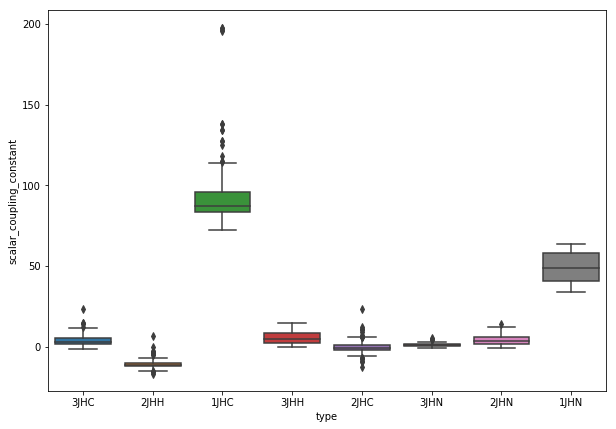

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train_sample,x='type',y='scalar_coupling_constant')

In [10]:
train.corr()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
id,1.000000,0.200476,0.056080,-0.006968
atom_index_0,0.200476,1.000000,0.145740,0.018839
atom_index_1,0.056080,0.145740,1.000000,-0.218989
scalar_coupling_constant,-0.006968,0.018839,-0.218989,1.000000


## Train vs Test Data

In [6]:
test=pd.read_csv('test.csv')
test.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [7]:
test.isna().describe(include='all')

,id,molecule_name,atom_index_0,atom_index_1,type
count,2505542,2505542,2505542,2505542,2505542
unique,1,1,1,1,1
top,False,False,False,False,False
freq,2505542,2505542,2505542,2505542,2505542


In [12]:
print('Train samples: %d '%train.shape[0])
print('Test samples: %d'%test.shape[0])
print('Difference: %d'%(train.shape[0]-test.shape[0]))

Train samples: 4658147 
Test samples: 2505542
Difference: 2152605


In [13]:
#Samples that are not present in train data
train_unique_mols=set(train['molecule_name'].unique())
test_unique_mols=set(test['molecule_name'].unique())
print('unique molecules in train: %d'%len(train_unique_mols))
print('unique molecules in test: %d'%len(test_unique_mols))

unique molecules in train: 85003
unique molecules in test: 45772


In [14]:
common_mols=train_unique_mols.intersection(test_unique_mols)
print('common molecules %d'%len(common_mols))

common molecules 0


In [15]:
train_unique_mols=list(train_unique_mols)
train_unique_mols.sort()
test_unique_mols=list(test_unique_mols)
test_unique_mols.sort()
print(train_unique_mols[:50])
print(test_unique_mols[:50])
print('\nlast molecules: {} {}'.format(train_unique_mols[-1],test_unique_mols[-1]))

['dsgdb9nsd_000001', 'dsgdb9nsd_000002', 'dsgdb9nsd_000003', 'dsgdb9nsd_000005', 'dsgdb9nsd_000007', 'dsgdb9nsd_000008', 'dsgdb9nsd_000009', 'dsgdb9nsd_000010', 'dsgdb9nsd_000011', 'dsgdb9nsd_000012', 'dsgdb9nsd_000013', 'dsgdb9nsd_000014', 'dsgdb9nsd_000017', 'dsgdb9nsd_000018', 'dsgdb9nsd_000019', 'dsgdb9nsd_000021', 'dsgdb9nsd_000023', 'dsgdb9nsd_000026', 'dsgdb9nsd_000027', 'dsgdb9nsd_000028', 'dsgdb9nsd_000029', 'dsgdb9nsd_000030', 'dsgdb9nsd_000031', 'dsgdb9nsd_000032', 'dsgdb9nsd_000033', 'dsgdb9nsd_000034', 'dsgdb9nsd_000037', 'dsgdb9nsd_000038', 'dsgdb9nsd_000039', 'dsgdb9nsd_000040', 'dsgdb9nsd_000044', 'dsgdb9nsd_000046', 'dsgdb9nsd_000047', 'dsgdb9nsd_000049', 'dsgdb9nsd_000050', 'dsgdb9nsd_000051', 'dsgdb9nsd_000052', 'dsgdb9nsd_000053', 'dsgdb9nsd_000055', 'dsgdb9nsd_000056', 'dsgdb9nsd_000057', 'dsgdb9nsd_000059', 'dsgdb9nsd_000060', 'dsgdb9nsd_000063', 'dsgdb9nsd_000065', 'dsgdb9nsd_000066', 'dsgdb9nsd_000067', 'dsgdb9nsd_000068', 'dsgdb9nsd_000075', 'dsgdb9nsd_000076']

In [16]:
train_types=set(train['type'])
test_types=set(test['type'])
print('train number of types: %d'%len(train_types))
print('test number of types: %d'%len(test_types))

train number of types: 8
test number of types: 8


In [17]:
train_types.intersection(test_types)

{'1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'}

## Exploring other files

In [18]:
!ls

champs-scalar-coupling_new.zip	scalar_coupling_contributions.csv
dipole_moments.csv		structures.csv
magnetic_shielding_tensors.csv	structures.zip
mulliken_charges.csv		test.csv
potential_energy.csv		train.csv
sample_submission.csv


In [19]:
dipole=pd.read_csv('dipole_moments.csv')
dipole.head()

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


In [20]:
dipole.isna().describe().T

,count,unique,top,freq
molecule_name,85003,1,False,85003
X,85003,1,False,85003
Y,85003,1,False,85003
Z,85003,1,False,85003


In [21]:
dipole.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
molecule_name,85003,85003,dsgdb9nsd_036884,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X,85003,NaN,NaN,NaN,-0.0199372,2.28374,-22.958,-1.36325,-0.0001,1.311,21.8738
Y,85003,NaN,NaN,NaN,0.0937641,1.7394,-9.2523,-0.94195,0.0814,1.16675,13.0056
Z,85003,NaN,NaN,NaN,0.252982,1.02757,-6.0285,-0.24775,0.1176,0.90205,6.8801


In [22]:
magnetic_shielding_tensors=pd.read_csv('magnetic_shielding_tensors.csv')
magnetic_shielding_tensors.head()

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


In [23]:
magnetic_shielding_tensors.isna().describe().T

,count,unique,top,freq
molecule_name,1533537,1,False,1533537
atom_index,1533537,1,False,1533537
XX,1533537,1,False,1533537
YX,1533537,1,False,1533537
ZX,1533537,1,False,1533537
XY,1533537,1,False,1533537
YY,1533537,1,False,1533537
ZY,1533537,1,False,1533537
XZ,1533537,1,False,1533537
YZ,1533537,1,False,1533537


In [24]:
magnetic_shielding_tensors.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
molecule_name,1533537,85003,dsgdb9nsd_060337,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atom_index,1.53354e+06,NaN,NaN,NaN,8.7592,5.59281,0,4,9,13,28
XX,1.53354e+06,NaN,NaN,NaN,68.8158,114.787,-3452.65,28.0447,31.909,148.043,425.402
YX,1.53354e+06,NaN,NaN,NaN,-0.0932611,36.9127,-758.295,-3.3342,0.001,3.3733,1080.23
ZX,1.53354e+06,NaN,NaN,NaN,0.0994132,34.1366,-731.99,-2.5412,0,2.6175,662.049
XY,1.53354e+06,NaN,NaN,NaN,-0.132088,36.7994,-944.745,-3.202,0.0009,3.236,1273.99
YY,1.53354e+06,NaN,NaN,NaN,65.4924,106.301,-2146.68,27.1933,31.7476,136.171,425.466
ZY,1.53354e+06,NaN,NaN,NaN,-0.0322805,33.7063,-645.761,-2.7951,-0,2.8451,673.915
XZ,1.53354e+06,NaN,NaN,NaN,0.105588,34.8428,-704.347,-2.4845,0,2.5527,863.361
YZ,1.53354e+06,NaN,NaN,NaN,0.0272982,34.1687,-654.202,-2.8011,0,2.872,738.415


In [25]:
mulliken_charges=pd.read_csv('mulliken_charges.csv')
mulliken_charges.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [26]:
mulliken_charges.isna().describe().T

,count,unique,top,freq
molecule_name,1533537,1,False,1533537
atom_index,1533537,1,False,1533537
mulliken_charge,1533537,1,False,1533537


In [27]:
mulliken_charges.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
molecule_name,1533537,85003,dsgdb9nsd_060337,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atom_index,1.53354e+06,NaN,NaN,NaN,8.7592,5.59281,0,4,9,13,28
mulliken_charge,1.53354e+06,NaN,NaN,NaN,-2.25622e-10,0.225439,-0.73345,-0.191533,0.098678,0.127396,0.728981


In [28]:
potential_energy=pd.read_csv('potential_energy.csv')
potential_energy.head()

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


In [29]:
potential_energy.isna().describe().T

,count,unique,top,freq
molecule_name,85003,1,False,85003
potential_energy,85003,1,False,85003


In [30]:
potential_energy.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
molecule_name,85003,85003,dsgdb9nsd_036884,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
potential_energy,85003,NaN,NaN,NaN,-410.874,39.8289,-714.626,-438.001,-416.922,-387.219,-40.5237


In [31]:
scalar_coupling_contributions=pd.read_csv('scalar_coupling_contributions.csv')
scalar_coupling_contributions.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


In [32]:
scalar_coupling_contributions.isna().describe().T

,count,unique,top,freq
molecule_name,4658147,1,False,4658147
atom_index_0,4658147,1,False,4658147
atom_index_1,4658147,1,False,4658147
type,4658147,1,False,4658147
fc,4658147,1,False,4658147
sd,4658147,1,False,4658147
pso,4658147,1,False,4658147
dso,4658147,1,False,4658147


In [33]:
scalar_coupling_contributions.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
molecule_name,4658147,85003,dsgdb9nsd_042139,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atom_index_0,4.65815e+06,NaN,NaN,NaN,13.3569,3.26771,0,11,13,16,28
atom_index_1,4.65815e+06,NaN,NaN,NaN,5.88397,4.99394,0,2,5,8,28
type,4658147,8,3JHC,1510379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fc,4.65815e+06,NaN,NaN,NaN,15.6978,34.4146,-37.224,-0.212965,2.32714,7.47288,205.517
sd,4.65815e+06,NaN,NaN,NaN,0.0823364,0.138652,-3.18491,-0.014381,0.050729,0.130352,2.29669
pso,4.65815e+06,NaN,NaN,NaN,0.375162,0.742213,-3.28811,-0.035065,0.159481,0.435044,8.20153
dso,4.65815e+06,NaN,NaN,NaN,-0.233612,0.929604,-6.85679,-0.373425,-0.064766,0.143321,1.70161


In [34]:
structures=pd.read_csv('structures.csv')
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [35]:
structures.isna().describe().T

,count,unique,top,freq
molecule_name,2358657,1,False,2358657
atom_index,2358657,1,False,2358657
atom,2358657,1,False,2358657
x,2358657,1,False,2358657
y,2358657,1,False,2358657
z,2358657,1,False,2358657


In [36]:
structures.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
molecule_name,2358657,130775,dsgdb9nsd_121910,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atom_index,2.35866e+06,NaN,NaN,NaN,8.75735,5.59249,0,4,9,13,28
atom,2358657,5,H,1208387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x,2.35866e+06,NaN,NaN,NaN,0.0948918,1.65527,-9.23489,-0.87461,0.0518362,1.1161,9.38224
y,2.35866e+06,NaN,NaN,NaN,-0.333738,1.98915,-9.93394,-1.82616,-0.403593,1.37366,10.182
z,2.35866e+06,NaN,NaN,NaN,0.062415,1.44587,-9.13476,-0.84249,0.0109321,0.939436,7.89473


In [46]:
structures['atom'].unique()

array(['C', 'H', 'N', 'O', 'F'], dtype=object)

### Checking the addition of contributions to scalar coupling constant

In [37]:
scalar_coupling_contributions.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


In [38]:
scalar_coupling_contributions['total']=scalar_coupling_contributions['fc']+scalar_coupling_contributions['sd']+ \
                                       scalar_coupling_contributions['sd']+scalar_coupling_contributions['pso']+ \
                                       scalar_coupling_contributions['dso']

In [39]:
(scalar_coupling_contributions['total']==train['scalar_coupling_constant']).value_counts()

False    4658138
True           9
dtype: int64

In [40]:
scalar_coupling_contributions['is_equal']=scalar_coupling_contributions['total']==train['scalar_coupling_constant']
scalar_coupling_contributions.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,total,is_equal
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,85.062188,False
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,-10.903954,False
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,-10.901962,False
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,-10.901412,False
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,85.061993,False


In [41]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [42]:
charges_mols=set(mulliken_charges['molecule_name'].unique())
structure_mols=set(structures['molecule_name'].unique())

In [43]:
print(len(charges_mols))
print(len(structure_mols))

85003
130775


In [44]:
train_unique_mols

['dsgdb9nsd_000001',
 'dsgdb9nsd_000002',
 'dsgdb9nsd_000003',
 'dsgdb9nsd_000005',
 'dsgdb9nsd_000007',
 'dsgdb9nsd_000008',
 'dsgdb9nsd_000009',
 'dsgdb9nsd_000010',
 'dsgdb9nsd_000011',
 'dsgdb9nsd_000012',
 'dsgdb9nsd_000013',
 'dsgdb9nsd_000014',
 'dsgdb9nsd_000017',
 'dsgdb9nsd_000018',
 'dsgdb9nsd_000019',
 'dsgdb9nsd_000021',
 'dsgdb9nsd_000023',
 'dsgdb9nsd_000026',
 'dsgdb9nsd_000027',
 'dsgdb9nsd_000028',
 'dsgdb9nsd_000029',
 'dsgdb9nsd_000030',
 'dsgdb9nsd_000031',
 'dsgdb9nsd_000032',
 'dsgdb9nsd_000033',
 'dsgdb9nsd_000034',
 'dsgdb9nsd_000037',
 'dsgdb9nsd_000038',
 'dsgdb9nsd_000039',
 'dsgdb9nsd_000040',
 'dsgdb9nsd_000044',
 'dsgdb9nsd_000046',
 'dsgdb9nsd_000047',
 'dsgdb9nsd_000049',
 'dsgdb9nsd_000050',
 'dsgdb9nsd_000051',
 'dsgdb9nsd_000052',
 'dsgdb9nsd_000053',
 'dsgdb9nsd_000055',
 'dsgdb9nsd_000056',
 'dsgdb9nsd_000057',
 'dsgdb9nsd_000059',
 'dsgdb9nsd_000060',
 'dsgdb9nsd_000063',
 'dsgdb9nsd_000065',
 'dsgdb9nsd_000066',
 'dsgdb9nsd_000067',
 'dsgdb9nsd_0